In [88]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# import igraph as ig
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

In [10]:
data = pd.read_json('../Data/products.json', lines=True)
data

,_id,title,category,price,avg_rating,reviews_number,questions_number,pictures,description,features,versions,bought_together,also_bought,also_viewed
0,B07DMJPV31,FIFA 19 - PlayStation 4,videogames,{'$numberDouble': '29.98'},{'$numberDouble': '4.6'},{'$numberInt': '980'},{'$numberInt': '270'},[https://images-na.ssl-images-amazon.com/image...,Descrizione prodotto\nElectronic Arts FIFA 19\...,[FIFA 19 ti permette di giocare ai più importa...,"[B07GPWY3N6, B07DM14WW1, B07GPMFLBW, B07DM88YS...",[B07HHPX4N1],"[B07HHPX4N1, B07HGBNWTY, B07894WX4H]","[B07DMCFY6P, B07DLXBGN8, B07CPG3LK8]"
1,B07NVMYB7K,Sega Megadrive Mini,videogames,{'$numberDouble': '79.99'},None,{'$numberInt': '0'},{'$numberInt': '0'},[https://images-na.ssl-images-amazon.com/image...,,"[L'iconica console di SEGA, il 55% più piccola...",[],[B07Q32Z74P],"[B07PBKX3FG, B07Q32Z74P, B07Q82PCWX]","[B07Q82PCWX, B07Q9553QS, B06XWBLSKW]"
2,B072N5968B,Yoshi`s Crafted World - Nintendo Switch,videogames,{'$numberDouble': '49.99'},{'$numberInt': '5'},{'$numberInt': '5'},{'$numberInt': '14'},[https://images-na.ssl-images-amazon.com/image...,Descrizione prodotto\nYoshi torna per un'avven...,[Unisciti a Yoshi in una nuovo platform d'azio...,[B07Q42PBYV],[B071GQXPTP],"[B07HTDXTH8, B07NSMQGPV, B07CBPK5BG]","[B07HTMYH43, B07CBPK5BG, B07MC8XD9C]"
3,B01MS894C1,Mario Kart 8 Deluxe - Nintendo Switch,videogames,{'$numberDouble': '48.99'},{'$numberDouble': '4.8'},{'$numberInt': '406'},{'$numberInt': '51'},[https://images-na.ssl-images-amazon.com/image...,Descrizione prodotto\nMario Kart\nIl multiplay...,[La versione definitiva di Mario Kart 8 sino a...,"[B07KKDZZRM, B07JJJPT6F]",[B07CB7X61L],"[B07CB7X61L, B01NCZO2LK, B01N7RIIR2]","[B072N597H5, B07DMFRJVK, B07HTMYH43]"
4,B07FLG9Z17,The Division 2 - PlayStation 4,videogames,{'$numberDouble': '45.78'},{'$numberDouble': '4.7'},{'$numberInt': '15'},{'$numberInt': '12'},[https://images-na.ssl-images-amazon.com/image...,Descrizione prodotto\nSono trascorsi sette mes...,[Clancy's the Division 2 è uno sparatutto d'az...,"[B07MFZ3WGL, B07MKPML4M, B07FDVGW1X, B07MH3BRQ...","[B07DMFZ4D6, B07DPJPWSK]","[B079JF5P7Q, B07DMFZ4D6, B07DX42FRD]","[B07BMPVG1S, B07BC376BR, B07PDVQ2BB]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20454,B07Q84HHHH,Porta Carte di Credito da Uomo | Portafoglio p...,luggage,{'$numberDouble': '15.99'},None,{'$numberInt': '0'},{'$numberInt': '0'},[https://images-na.ssl-images-amazon.com/image...,Gli accessori possono fare la differenza tra f...,[✅ DESIGN INNOVATIVO – Questo porta carte di c...,[],[],[],"[B07MVM5R4M, B07Q3R2HRT, B07Q4P9BY8]"
20455,B07PPRZVTS,Borsa Paillettes Reversibili Borsa Magia Siren...,luggage,{'$numberDouble': '11.99'},{'$numberInt': '5'},{'$numberInt': '1'},{'$numberInt': '0'},[https://images-na.ssl-images-amazon.com/image...,,[Alla Moda e Pratica: lo zaino con coulisse su...,"[B07MXY4H3F, B07MXYSTPL]",[],[],"[B07HNNB1SX, B077ZQQ2NR, B07KYJ2F75]"
20456,B07ND2K124,"Cuscino da viaggio, Efficient, Cuscini da viag...",luggage,None,{'$numberInt': '5'},{'$numberInt': '6'},{'$numberInt': '1'},[https://images-na.ssl-images-amazon.com/image...,PARTI CON EFFICIENT IL COMPAGNO DA VIAGGIO IDE...,[➤ COMODO E MULTIUSO – Efficient pillow è conf...,[],[],[],"[B07HM9YRCY, B00LB7REFK, B009416CVC]"
20457,B07NPD1KWX,Lieja Bluetooth Selfie Mobile Selfie Artifact ...,electronics,{'$numberInt': '10'},None,{'$numberInt': '0'},{'$numberInt': '0'},[https://images-na.ssl-images-amazon.com/image...,"Materiale: ABS.\nColore: bianco, rosso, blu, n...",[Soluzione wireless perfetta per scattare self...,[B07NPLBXHZ],[],[],[]


In [51]:
data['description']

0        Descrizione prodotto\nElectronic Arts FIFA 19\...
1                                                         
2        Descrizione prodotto\nYoshi torna per un'avven...
3        Descrizione prodotto\nMario Kart\nIl multiplay...
4        Descrizione prodotto\nSono trascorsi sette mes...
                               ...                        
20454    Gli accessori possono fare la differenza tra f...
20455                                                     
20456    PARTI CON EFFICIENT IL COMPAGNO DA VIAGGIO IDE...
20457    Materiale: ABS.\nColore: bianco, rosso, blu, n...
20458    V5.0 Cuffie senza fili Bluetooth per iPhone Sa...
Name: description, Length: 20459, dtype: object

In [52]:
data['description'][0]

"Descrizione prodotto\nElectronic Arts FIFA 19\nGameplay\nLe funzioni presenti ti permettono di controllare ciò che succede in campo in ogni momento.\nEditore: Electronic Arts Inc.\nSviluppatore: EA Vancouver ed EA Romania\nPiattaforme: PS4, Xbox One, PC\nNumero di giocatori online: 1-22\nNumero di giocatori offline: 1-4\nGrazie al motore Frostbite, EA SPORTS FIFA 19 offre un'esperienza da campioni, dentro e fuori dal campo. Con l'aggiunta della UEFA Champions League, FIFA 19 offre funzionalità di gioco migliorate.\nInclude l'emozionante finale della storia di Alex Hunter con Il Viaggio: Campioni\nFIFA 19 ti permette di giocare ai più importanti tornei per club, grazie a una serie di modalità\nModalità Champions League: vivi tutte le emozioni del torneo ufficiale della UEFA Champions League\nLasciati coinvolgere dai tornei per club d'Europa con le grafiche televisive, le divise e gli stemmi\nSistema Active Touch\nIl sistema Active Touch cambia radicalmente il modo di ricevere e colpire

In [53]:
print(word_tokenize(data['title'][0]))

['FIFA', '19', '-', 'PlayStation', '4']


In [54]:
type(data['title'])

pandas.core.series.Series

In [55]:
data['token_title']=data['title'].apply(word_tokenize)

In [56]:
data['token_title']

0                            [FIFA, 19, -, PlayStation, 4]
1                                  [Sega, Megadrive, Mini]
2        [Yoshi, `, s, Crafted, World, -, Nintendo, Swi...
3            [Mario, Kart, 8, Deluxe, -, Nintendo, Switch]
4                    [The, Division, 2, -, PlayStation, 4]
                               ...                        
20454    [Porta, Carte, di, Credito, da, Uomo, |, Porta...
20455    [Borsa, Paillettes, Reversibili, Borsa, Magia,...
20456    [Cuscino, da, viaggio, ,, Efficient, ,, Cuscin...
20457    [Lieja, Bluetooth, Selfie, Mobile, Selfie, Art...
20458    [AIJEESI, Auricolari, Bluetooth, V5.0, con, Ri...
Name: token_title, Length: 20459, dtype: object

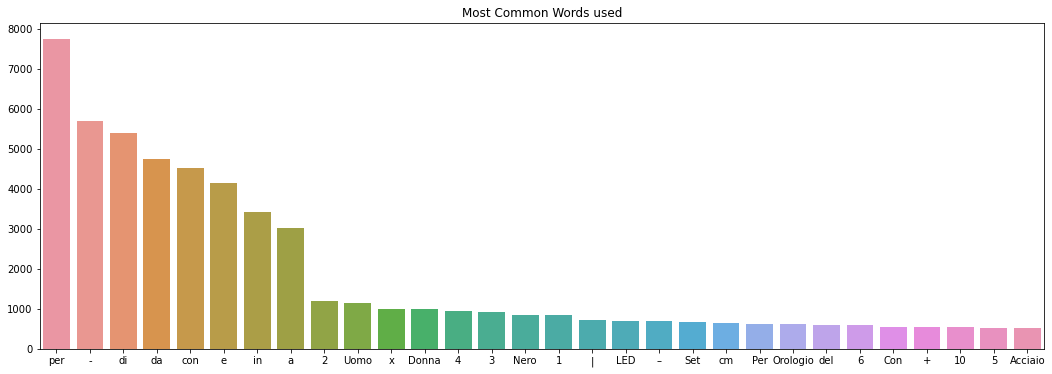

In [93]:
words = ' '.join(data['title']).split()
counts = Counter(words)
common_words = [word[0] for word in counts.most_common(30)]
common_counts = [word[1] for word in counts.most_common(30)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=common_words, y=common_counts)
plt.title('Most Common Words used')
plt.show()

In [94]:
print(counts.most_common(30))

[('per', 7769), ('-', 5711), ('di', 5412), ('da', 4762), ('con', 4545), ('e', 4155), ('in', 3425), ('a', 3029), ('2', 1209), ('Uomo', 1164), ('x', 1019), ('Donna', 1004), ('4', 947), ('3', 937), ('Nero', 864), ('1', 859), ('|', 726), ('LED', 707), ('–', 697), ('Set', 687), ('cm', 653), ('Per', 643), ('Orologio', 633), ('del', 618), ('6', 604), ('Con', 565), ('+', 555), ('10', 549), ('5', 536), ('Acciaio', 529)]


In [59]:
categories = data['category'].value_counts()
print("number of categories: {}".format(len(categories)))
print("Categories:")
print(categories)

number of categories: 37
Categories:
kitchen                1784
electronics            1143
tools                  1125
books                   993
apparel                 946
sports                  887
english-books           873
jewelry                 846
hpc                     839
toys                    800
baby                    734
garden                  697
music                   672
shoes                   653
luggage                 638
beauty                  617
dvd                     616
musical-instruments     601
lighting                569
watch                   563
videogames              558
office                  512
pc                      508
grocery                 488
pet-supplies            456
appliances              418
handmade                392
industrial              381
automotive               72
luxury-beauty            30
NoStoreName              20
amazon-home              12
fiona-hardware-acc        5
amazon-ereaders           5
apple-devic

In [62]:
stop_words=nltk.corpus.stopwords.words('italian')
stop_words

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [69]:
data["cleaned_text"] = data["token_title"].apply(lambda title : [word for word in title if word not in stop_words])

In [87]:
data["cleaned_text"]

0                            [FIFA, 19, -, PlayStation, 4]
1                                  [Sega, Megadrive, Mini]
2        [Yoshi, `, s, Crafted, World, -, Nintendo, Swi...
3            [Mario, Kart, 8, Deluxe, -, Nintendo, Switch]
4                    [The, Division, 2, -, PlayStation, 4]
                               ...                        
20454    [Porta, Carte, Credito, Uomo, |, Portafoglio, ...
20455    [Borsa, Paillettes, Reversibili, Borsa, Magia,...
20456    [Cuscino, viaggio, ,, Efficient, ,, Cuscini, v...
20457    [Lieja, Bluetooth, Selfie, Mobile, Selfie, Art...
20458    [AIJEESI, Auricolari, Bluetooth, V5.0, Riprodu...
Name: cleaned_text, Length: 20459, dtype: object

In [99]:
sentences = (list(itertools.chain(data)))
#flat_list = [item for sublist in data["cleaned_text"] for item in sublist]
#flat_list

NameError: name 'itertools' is not defined

In [ ]:
sentences = (list(itertools.chain(df)))

In [91]:
counts = Counter(flat_list)
print(counts.most_common(30))


[(',', 24218), ('-', 5719), ('(', 3136), (')', 3121), ('.', 2702), ('2', 1431), ('Uomo', 1271), ('Nero', 1204), ('Donna', 1145), (':', 1116), ('4', 1068), ('3', 1055), ('cm', 1027), ('x', 1021), ('1', 1001), ('LED', 852), ('|', 726), ('Set', 723), ('–', 698), ('6', 688), ('Pezzi', 677), ('100', 662), ('Orologio', 644), ('Per', 643), ('10', 629), ('Bianco', 602), ('5', 599), ('[', 594), (']', 578), ('USB', 574)]


In [125]:
# NETWORK
data

#edge_list = pd.DataFrame(columns=['from','to'])
edge_list = []
for i, row in data.iterrows():
    for subrow in row['bought_together']:
        #print(row['_id'], ' ', subrow)
        #edge_list.append({'from': row['_id'], 'to': subrow}, ignore_index = True)
        ft = {'from': row['_id'], 'to': subrow, 'weight': 3}
        edge_list.append(ft)
    for subrow in row['also_bought']:
        ft = {'from': row['_id'], 'to': subrow, 'weight': 2}
        edge_list.append(ft)
    for subrow in row['also_viewed']:
        ft = {'from': row['_id'], 'to': subrow, 'weight': 1}
        edge_list.append(ft)
    if i > 250:
           break
edge_list = pd.DataFrame(edge_list)


# edges: 343


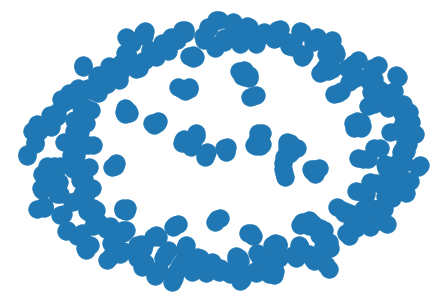

In [126]:
# network graph
print("# edges:", len(edge_list.loc[edge_list['weight']==3]))
#G=nx.from_pandas_edgelist(edge_list, source='from', target='to')
G=nx.from_pandas_edgelist(edge_list.loc[edge_list['weight']==3], source='from', target='to')


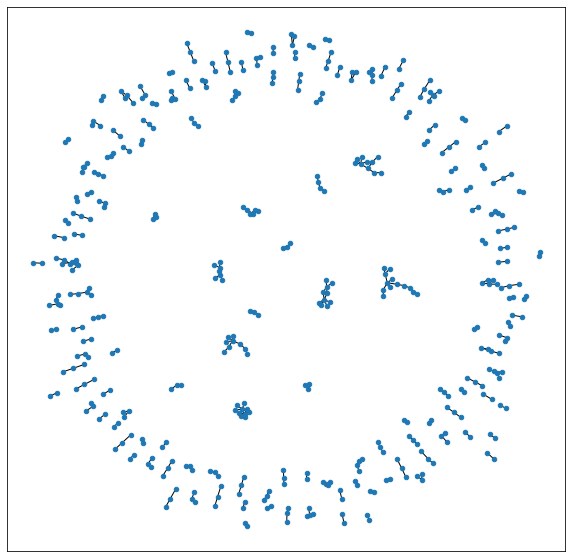

In [142]:
#nx.draw(G)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, with_labels = False, node_size=20)

In [118]:
# communities detection
communities = list(greedy_modularity_communities(G))
print("# communities:", len(communities))

# communities: 3351


[frozenset({'B005LEL3H4',
            'B00CUD327I',
            'B00D2NTU4Y',
            'B00D2NUBQU',
            'B00D2NVBFU',
            'B00D2NWD3O',
            'B00D2NY89G',
            'B00EOGZTBG',
            'B00EU7HR14',
            'B00HD49OH6',
            'B00HE5DQIC',
            'B00LL8RDU0',
            'B00O8NIJ2Q',
            'B00T7FBDXM',
            'B00UYFGVEA',
            'B00WJB31DG',
            'B00X6TFRR8',
            'B00XA8GGHK',
            'B00XBWT9JW',
            'B00XZQTG0G',
            'B00YGD764A',
            'B013DQ0V7Y',
            'B0149TL11E',
            'B0158WU8TC',
            'B017KBIJ7M',
            'B018LYIP3A',
            'B01AHSMHBO',
            'B01D2KJ30M',
            'B01DDIRVU2',
            'B01ER91MVU',
            'B01ER98OKC',
            'B01ERAYLIK',
            'B01F38OZA4',
            'B01FFA0WM0',
            'B01FGFW3LW',
            'B01H1G43G2',
            'B01HHUE2SG',
            'B01KFQACPQ',
            